In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

#loading the dataset
df = pd.read_csv(r"..\Data\Passenger_Satisfaction.csv")

# droping the null values
df = df.dropna()

# droping unnecessary columns
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)

# preprocessing the data
label_encoder = LabelEncoder()
for column in df[['Gender','Customer Type','Type of Travel','Class','satisfaction']]:
    df[column] = label_encoder.fit_transform(df[column])

# defining independent variables (x) and targeted variable (y)
x = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# spliting the data set into test,train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

models = [LogisticRegression(),AdaBoostClassifier(),RandomForestClassifier(),KNeighborsClassifier(),
         xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        ]
for model in models:
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)
    print(f"{type(model).__name__}")
    print("******Train******")
    print(f"accuracy score: {accuracy_score(y_train,train_prediction)}")
    print(f"precision_score: {precision_score(y_train,train_prediction)}")
    print(f"recall_score: {recall_score(y_train,train_prediction)}")
    print(f"f1_score: {f1_score(y_train,train_prediction)}")
    print("******Test******")
    print(f"accuracy score: {accuracy_score(y_test,test_prediction)}")
    print(f"precision_score: {precision_score(y_test,test_prediction)}")
    print(f"recall_score: {recall_score(y_test,test_prediction)}")
    print(f"f1_score: {f1_score(y_test,test_prediction)}")

C:\Users\vmami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
******Train******
accuracy score: 0.8158914027149321
precision_score: 0.7695986202571339
recall_score: 0.8205449682380475
f1_score: 0.7942556634304208
******Test******
accuracy score: 0.8172691732226459
precision_score: 0.7723619663918171
recall_score: 0.82176568573015
f1_score: 0.7962982890347573


C:\Users\vmami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier
******Train******
accuracy score: 0.9267812971342383
precision_score: 0.9210764104591405
recall_score: 0.908809762621197
f1_score: 0.9149019717835806
******Test******
accuracy score: 0.9282783918142767
precision_score: 0.9203846583920384
recall_score: 0.9140477512493059
f1_score: 0.9172052596389569
RandomForestClassifier
******Train******
accuracy score: 1.0
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
******Test******
accuracy score: 0.962208600801197
precision_score: 0.9713368493464801
recall_score: 0.9408106607440311
f1_score: 0.9558300896936875
KNeighborsClassifier
******Train******
accuracy score: 0.8290678733031674
precision_score: 0.8281674823273518
recall_score: 0.7637913741223671
f1_score: 0.7946777980693973
******Test******
accuracy score: 0.7468024518557845
precision_score: 0.7300208052869905
recall_score: 0.6624097723486951
f1_score: 0.6945738239403819
XGBClassifier
******Train******
accuracy score: 0.9638491704374057
precision_score: 0.9746349627

In [6]:
import mlflow
import numpy as np
import mlflow.sklearn
from mlflow.models import infer_signature
models = [
    (
        "LogisticRegression",
        {"max_iter":200, "random_state":42},
        LogisticRegression(),
        (x_train,y_train),
        (x_test,y_test)
    ),
    (
        "AdaBoostClassifier",
        {"n_estimators":150, "learning_rate":1.0, "random_state":42},
        AdaBoostClassifier(),
        (x_train,y_train),
        (x_test,y_test)
    ),
    (
        "KNeighborsClassifier",
        {"n_neighbors":5},
        KNeighborsClassifier(),
        (x_train,y_train),
        (x_test,y_test)
    ),
    (
        "RandomForestClassifier",
        {'n_estimators':200, 'random_state':42, 'max_depth':5},
        RandomForestClassifier(),
        (x_train,y_train),
        (x_test,y_test)
    ),
    (
        "XGBClassifier",
        {'n_estimators':200, 'random_state':42, 'learning_rate':0.1},
        xgb.XGBClassifier(),
        (x_train,y_train),
        (x_test,y_test)
    )
]


In [7]:
reports = []
for model_name, params, model, train_set, test_set in models:
    x_train = train_set[0]
    y_train = train_set[1]
    x_test = test_set[0]
    y_test = test_set[1]
    # Apply hyperparameters and train the model
    model.set_params(**params)
    model.fit(x_train,y_train)
    y_prediction = model.predict(x_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test,test_prediction)
    precision = precision_score(y_train,train_prediction)
    recall = recall_score(y_train,train_prediction)
    f1 = f1_score(y_test,test_prediction)
    # storing results
    reports.append((model_name, accuracy, precision, recall,f1))
reports

C:\Users\vmami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vmami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[('LogisticRegression',
  0.9584922052222598,
  0.9750122347928721,
  0.9421402542490751,
  0.9510696404187529),
 ('AdaBoostClassifier',
  0.9584922052222598,
  0.9750122347928721,
  0.9421402542490751,
  0.9510696404187529),
 ('KNeighborsClassifier',
  0.9584922052222598,
  0.9750122347928721,
  0.9421402542490751,
  0.9510696404187529),
 ('RandomForestClassifier',
  0.9584922052222598,
  0.9750122347928721,
  0.9421402542490751,
  0.9510696404187529),
 ('XGBClassifier',
  0.9584922052222598,
  0.9750122347928721,
  0.9421402542490751,
  0.9510696404187529)]

In [9]:
import mlflow.xgboost
import webbrowser
experiment_name = "Customer_satisfaction"
# setting experiment 
try:
    mlflow.set_experiment(experiment_name)
except:
    mlflow.create_experiment(experiment_name)
# giving tracking url
mlflow.set_tracking_uri("http://127.0.0.1:5000")
for i, element in enumerate(models):
    model_name = element[0]
    params = element[1]
    model = element[2]
    report = reports[i]
    with mlflow.start_run(run_name = model_name):
        mlflow.log_params(params)
        mlflow.log_metrics({'accuracy_score':report[1],
                            'precision_score':report[2],
                            'recall_score':report[3],
                            'f1_score':report[4]
                           })
        if "XGB" in model_name:
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

2025/02/09 23:50:20 INFO mlflow.tracking.fluent: Experiment with name 'Customer_satisfaction' does not exist. Creating a new experiment.
2025/02/09 23:50:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/206240902558227393/runs/68c9e84ad362408892d082e0aa7ff92e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/206240902558227393


2025/02/09 23:50:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run AdaBoostClassifier at: http://127.0.0.1:5000/#/experiments/206240902558227393/runs/30c93ab8097649ab9d2faecc93805c60
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/206240902558227393


2025/02/09 23:50:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNeighborsClassifier at: http://127.0.0.1:5000/#/experiments/206240902558227393/runs/45643e36aebd43a9a04a0e5d0bc5ae1e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/206240902558227393


2025/02/09 23:50:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/206240902558227393/runs/fd829f5cc8f747929ce074a2620d88f3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/206240902558227393


C:\Users\vmami\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:50:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/02/09 23:51:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier at: http://127.0.0.1:5000/#/experiments/206240902558227393/runs/5359792d26cd4abab4f40c093fcb0ec1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/206240902558227393


In [10]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


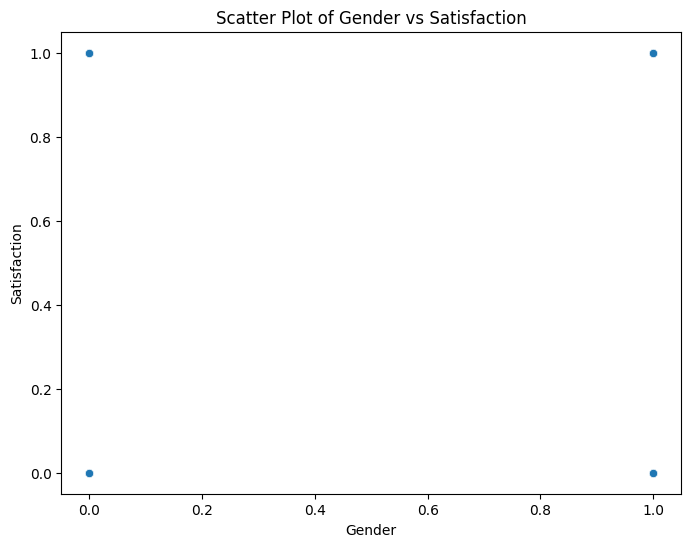

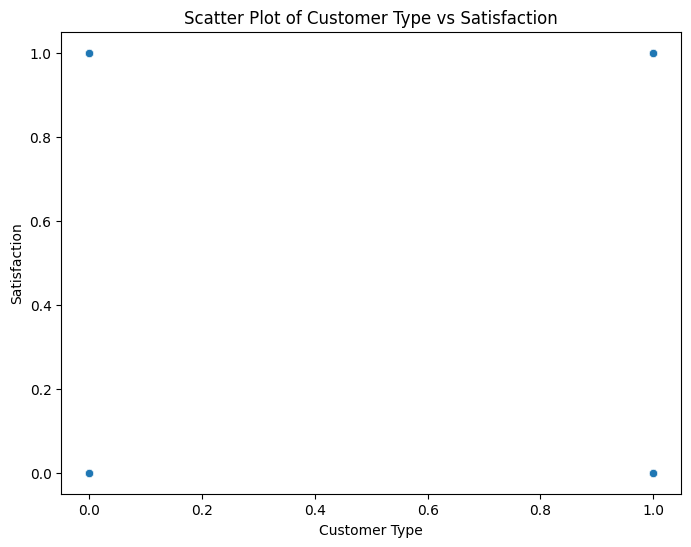

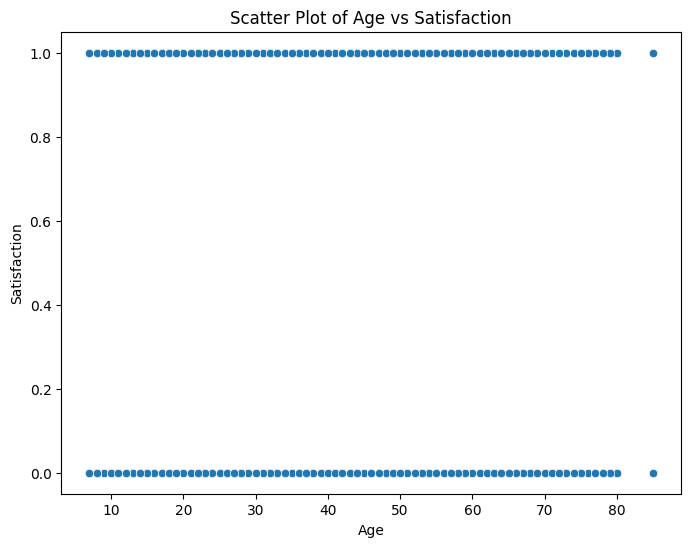

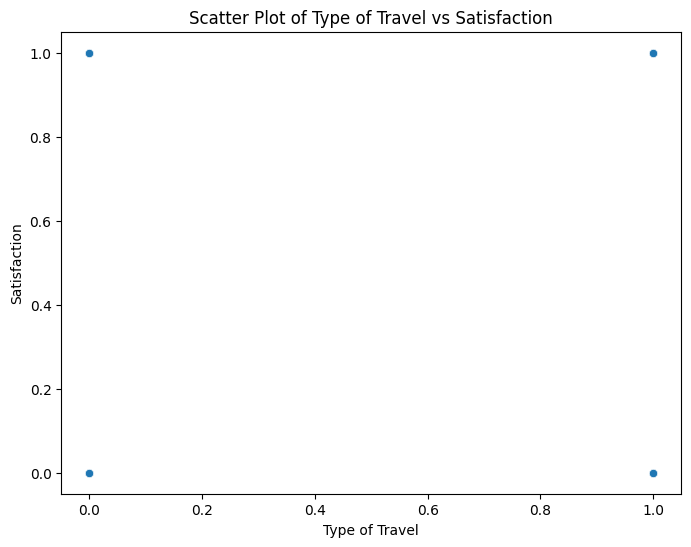

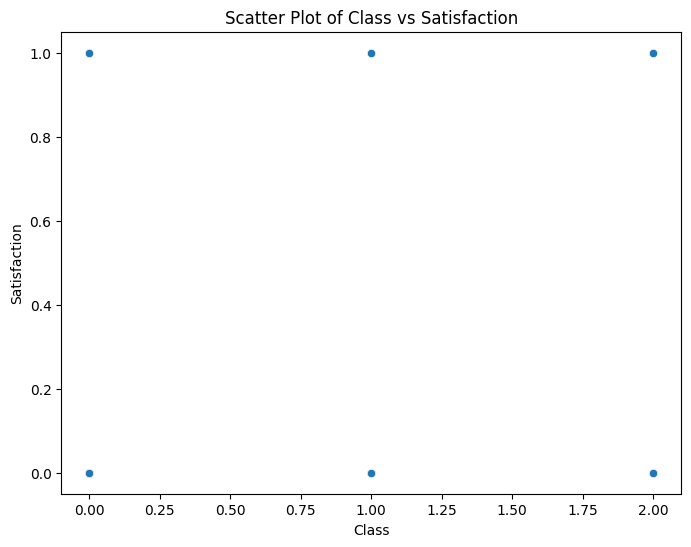

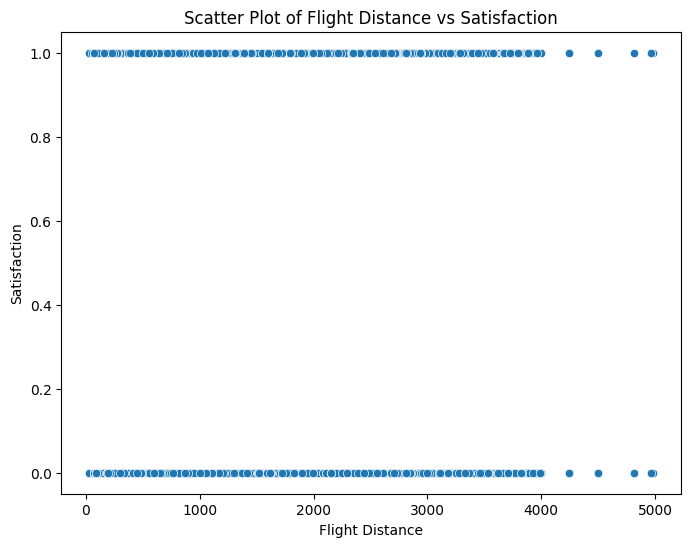

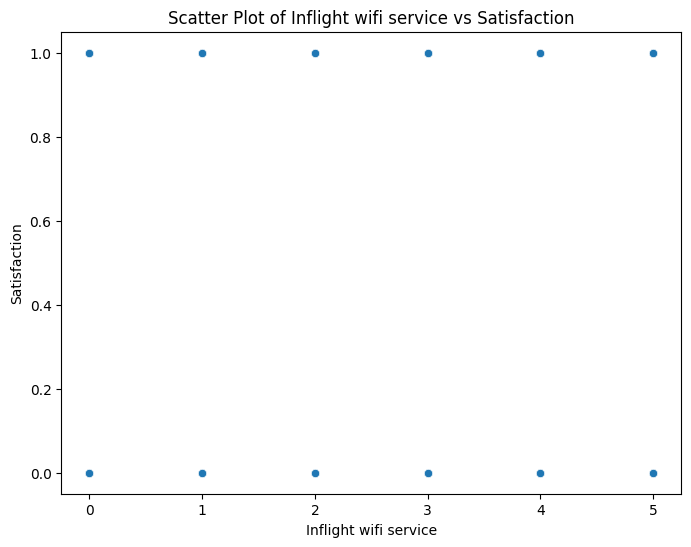

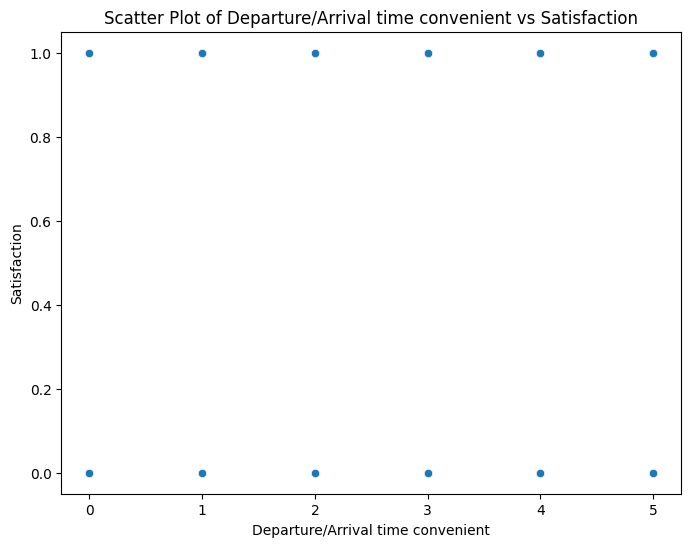

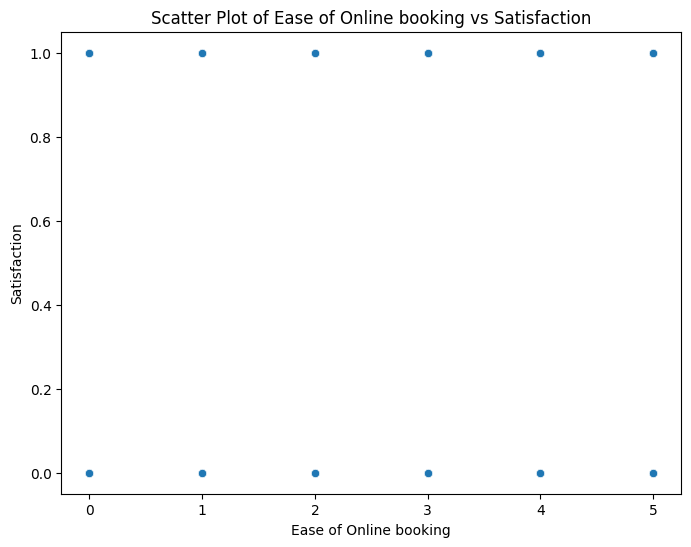

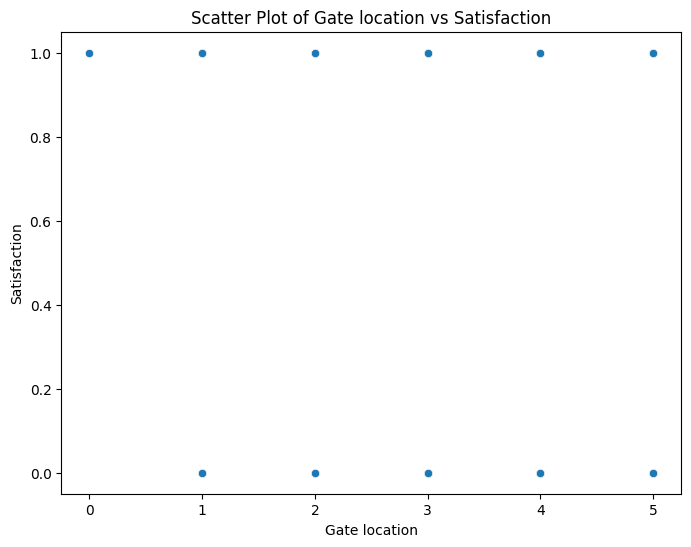

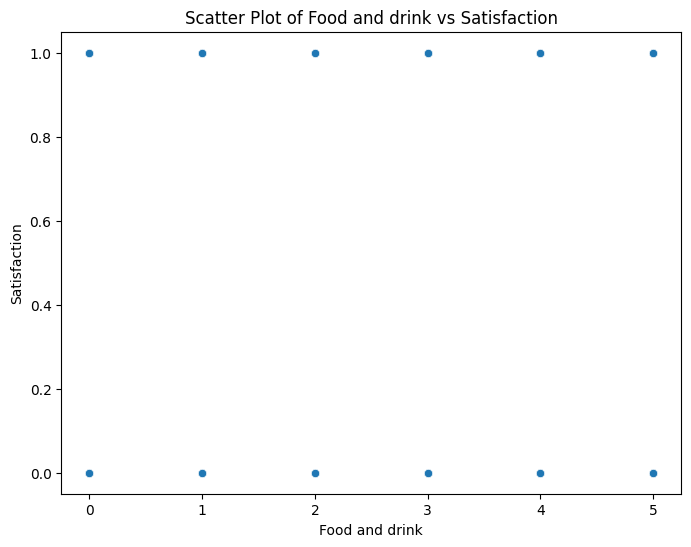

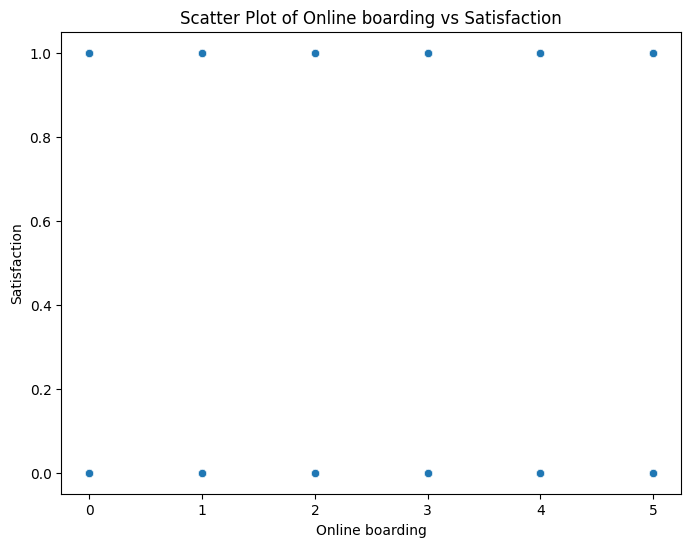

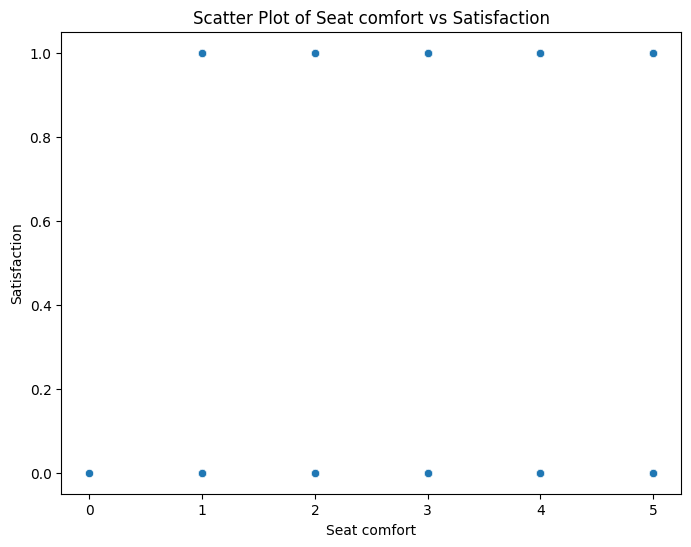

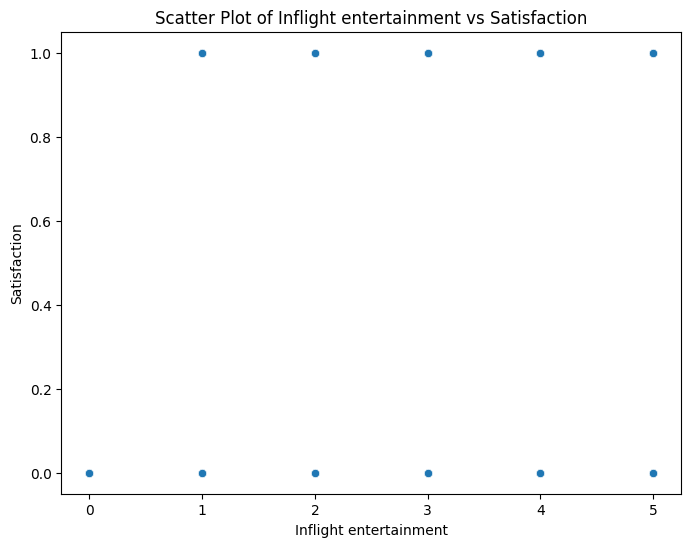

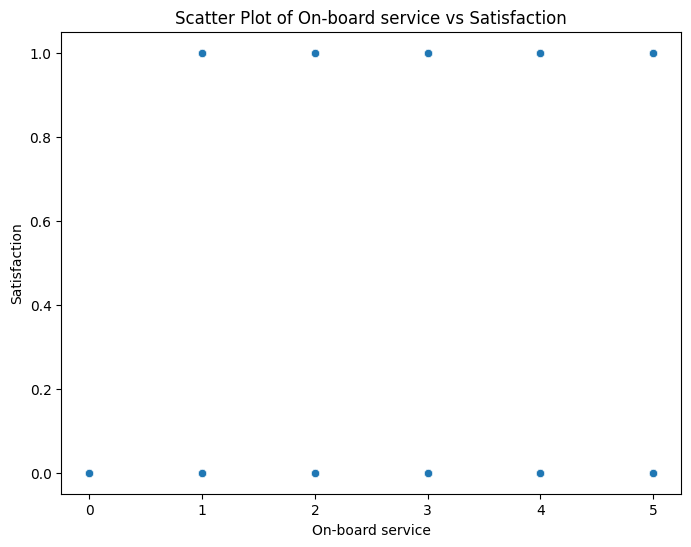

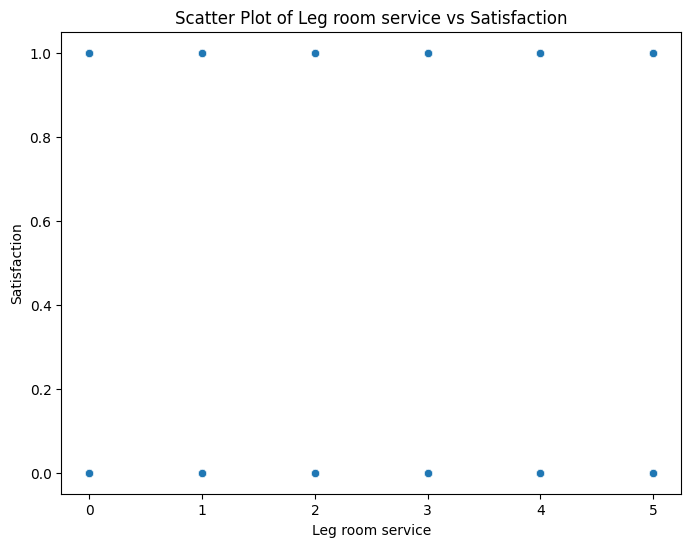

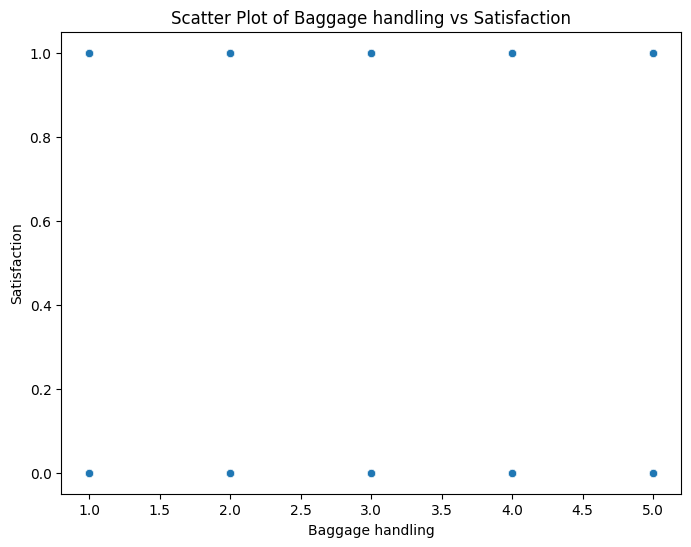

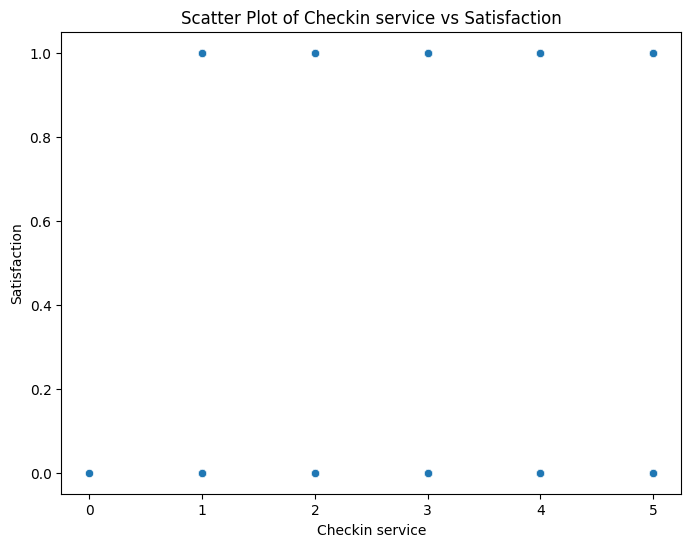

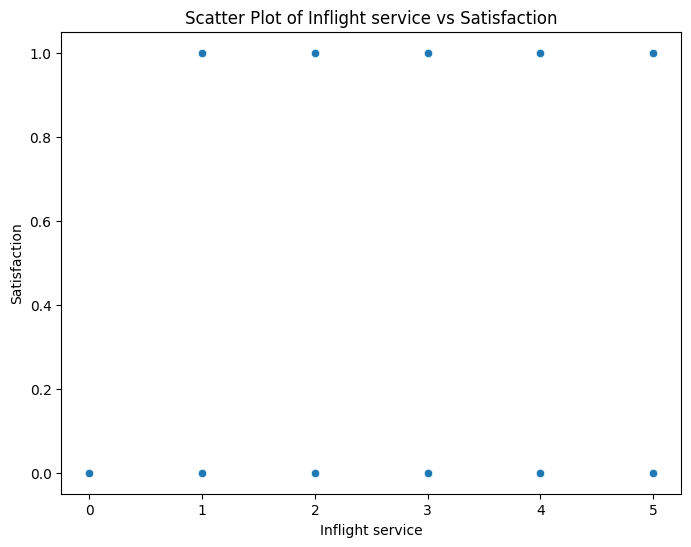

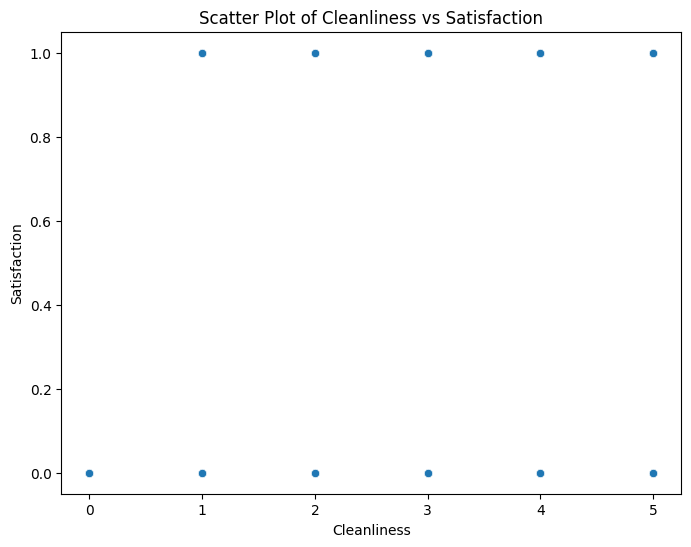

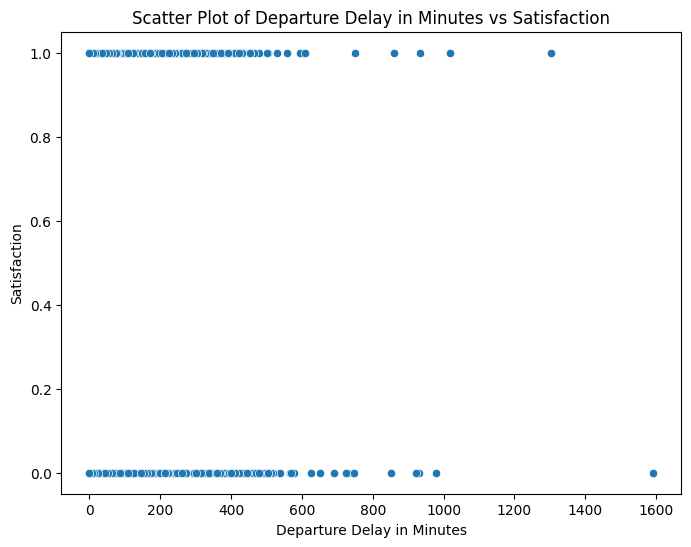

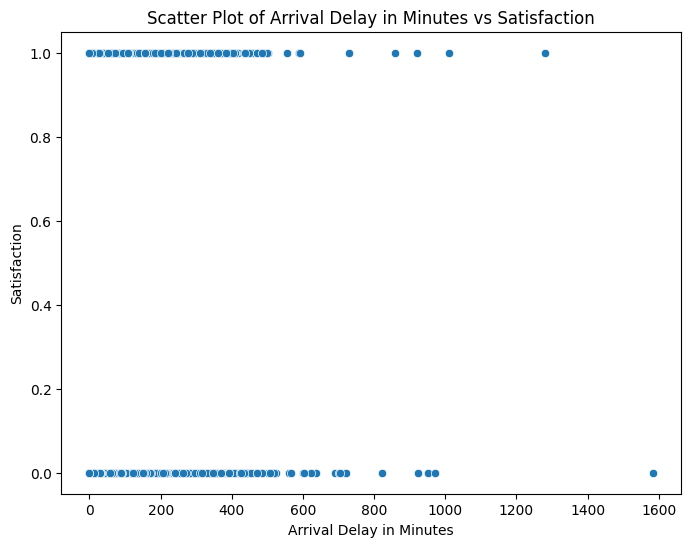

In [14]:
# Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
for feature in df.drop('satisfaction', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['satisfaction'])
    plt.title(f'Scatter Plot of {feature} vs Satisfaction')
    plt.xlabel(feature)
    plt.ylabel('Satisfaction')
    plt.show()

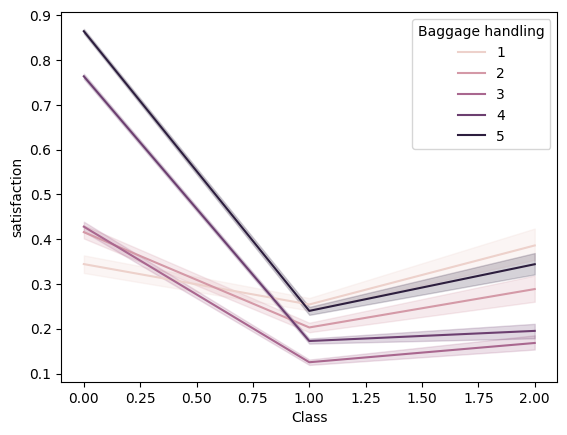

In [16]:
# line plot

sns.lineplot(df, x="Class", y = "satisfaction", hue = "Baggage handling")
plt.show()

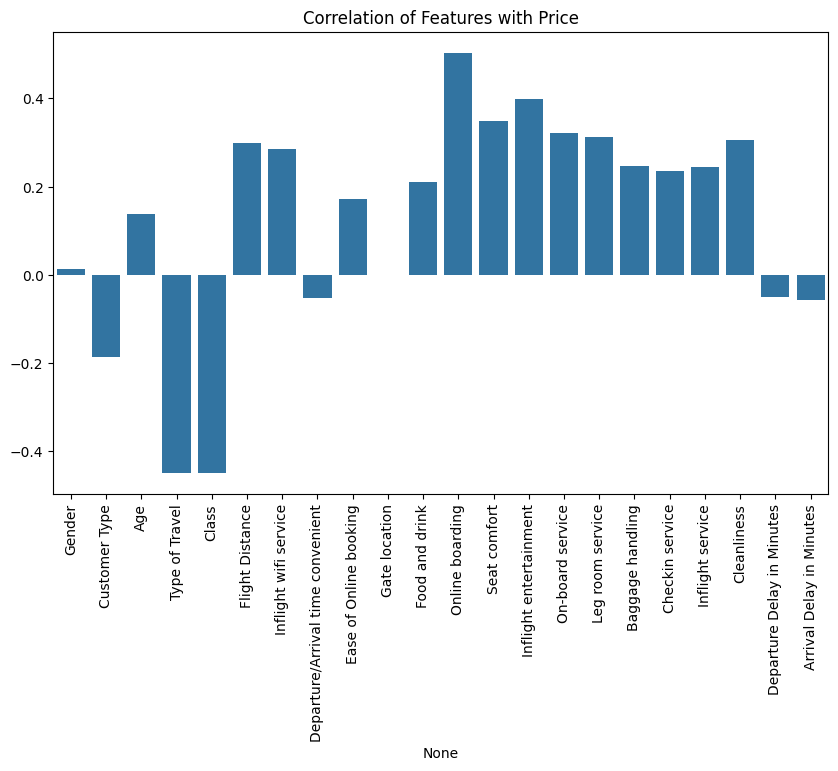

In [17]:
# bar chart

# Calculate correlation with 'Price'
correlation = df.corr()['satisfaction'].drop('satisfaction')

# Create a barplot of correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features with Price')
plt.xticks(rotation=90)
plt.show()

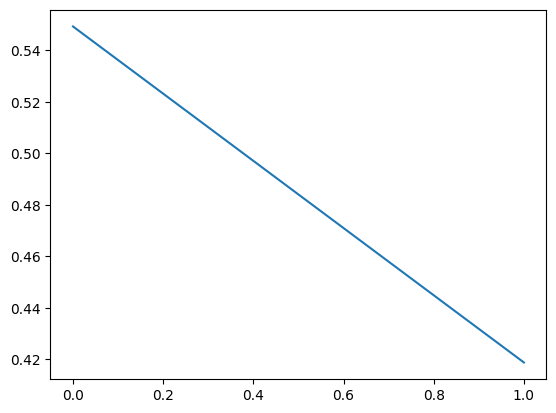

In [19]:
# probability density function
from scipy.stats import norm
mean = df['satisfaction'].mean()
std = df['satisfaction'].std()
satisfaction = np.sort(df['satisfaction'])
pdf = norm.pdf(satisfaction,mean,std)
plt.plot(satisfaction,pdf)
plt.show()

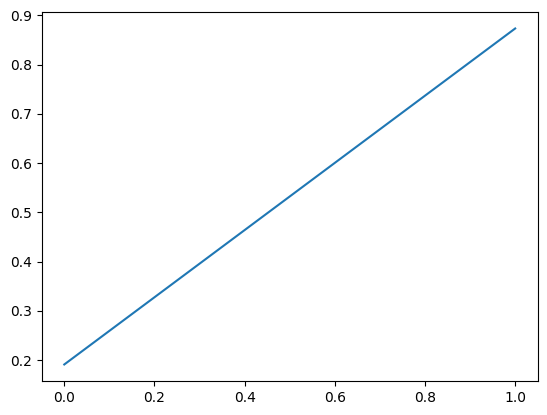

In [20]:
mean = df['satisfaction'].mean()
std = df['satisfaction'].std()
satisfaction = np.sort(df['satisfaction'])
cdf = norm.cdf(satisfaction,mean,std)
plt.plot(price,cdf)
plt.show()

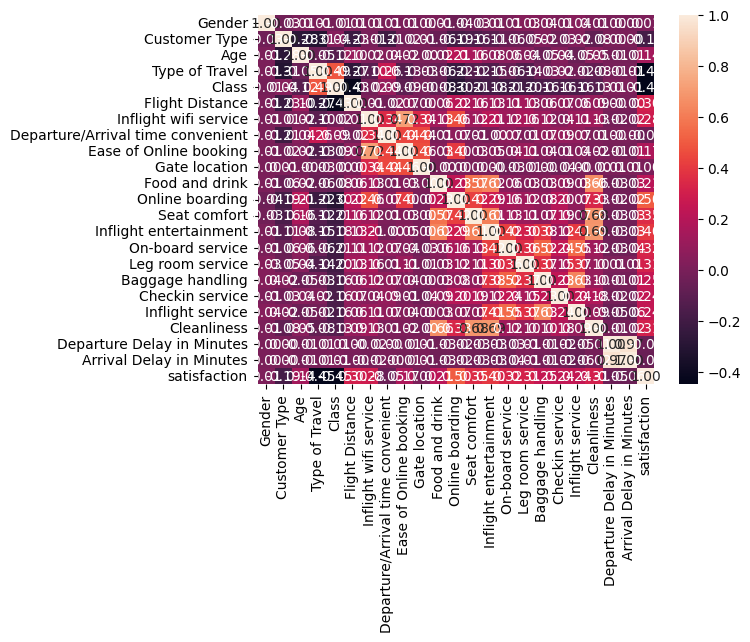

In [21]:
# heat map
corr = df.corr()
sns.heatmap(corr,fmt=".2f",annot = True)
plt.show()

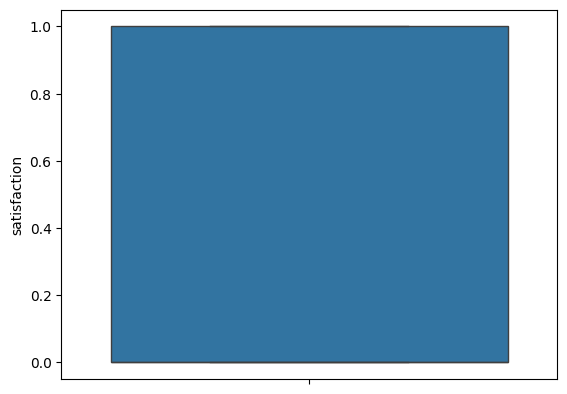

In [23]:
# box plot
sns.boxplot(df['satisfaction'])
plt.show()

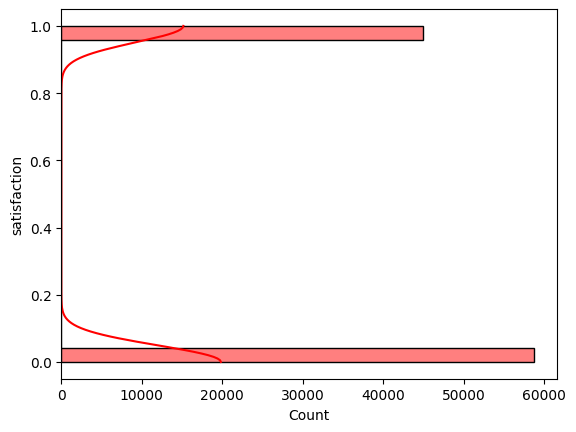

In [24]:
# hist plot
sns.histplot(df, y="satisfaction",kde=True,color='red')
plt.show()